In [35]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea

%matplotlib notebook

In [100]:
def isIn(x,y):
    return (x >= 0) and (y >= 0) and (x <= 1) and (y <= 1)

# def dist(xlst, ylst):
#     xforw = np.hstack((xlst[1:], [xlst[0]]))
#     yforw = np.hstack((ylst[1:], [ylst[0]]))
#     return np.sum(np.sqrt((xforw-xlst)**2 + (yforw-ylst)**2))

def distGreedyTSA(xlst, ylst):
    xlst_copy = list(xlst)
    ylst_copy = list(ylst)
    
    # Leave the first point fixed
    xlstNew = [xlst_copy[0]]
    ylstNew = [ylst_copy[0]]
    del xlst_copy[0]
    del ylst_copy[0]
    
    # For each fixed point
    distTot = 0
    for i in range(len(xlst)-1):
        
        # Loop over remaining points, and find the closest
        distNext = 10000
        posNext = 0
        for j in range(len(xlst_copy)):
            distTmp = np.sqrt((xlstNew[i] - xlst_copy[j])**2 + (ylstNew[i] - ylst_copy[j])**2)
            if distTmp < distNext:
                distNext = distTmp
                posNext = j
                
        # Add the closest point to sequence, add its distance, and remove that point from remaining points        
        distTot += distNext
        xlstNew += [xlst_copy[posNext]]
        ylstNew += [ylst_copy[posNext]]
        del xlst_copy[posNext]
        del ylst_copy[posNext]
        
    # Add final distance from final point to the starting point
    distTot += np.sqrt((xlstNew[0] - xlstNew[len(xlst)-1])**2 + (ylstNew[0] - ylstNew[len(xlst)-1])**2)
    
    return np.array(xlstNew), np.array(ylstNew), distTot


xlst = np.random.uniform(0, 1, 6)
ylst = np.random.uniform(0, 1, 6)
dthis = dist(xlst, ylst)
dbest = 0
xbest = xlst
ybest = ylst
# dhist = [dthis]

i = 0
stagnant = 0
ndrop = 0
sigma = 0.1
while dthis < 6.0:
#for i in range(100000):
    randPos = np.random.randint(6)
    randPosArr = np.zeros(6)
    randPosArr[randPos] = 1
    
    xlstNew = xlst + randPosArr * np.random.uniform(-sigma, sigma)
    ylstNew = ylst + randPosArr * np.random.uniform(-sigma, sigma)
    
#     allIn = True
#     for j in range(6):
#         allIn = allIn and isIn(xlstNew[j], ylstNew[j])
        
#     if allIn:
    if isIn(xlstNew[randPos], ylstNew[randPos]):
        xlstNew, ylstNew, distNew = distGreedyTSA(xlstNew, ylstNew)
        if distNew > dthis:
            stagnant = 0
            dthis = distNew
            xlst = xlstNew
            ylst = ylstNew
        else:
            stagnant+=1
            
        # If nothing happened for a while, decrease jump size
        if stagnant == 10:
            stagnant = 0
            ndrop += 1
            sigma /= 2
            
        # If jump already very small, restart
        if ndrop == 10:
            ndrop = 0
            stagnant = 0
            sigma = 0.1
            
            dthis = 0
            xlst = np.random.uniform(0, 1, 6)
            ylst = np.random.uniform(0, 1, 6)
            
    #dhist.append(dthis)
    i += 1
    if i == 10000:
        i = 0
        if dthis > dbest:
            dbest = dthis
            xbest = xlst
            ybest = ylst
            print("newBest=", dbest)
            
    
# plt.figure()
# plt.plot(dhist)
# plt.show()

newBest= 3.5906350778
newBest= 4.28851731553
newBest= 4.88620044308
newBest= 5.42922770411


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


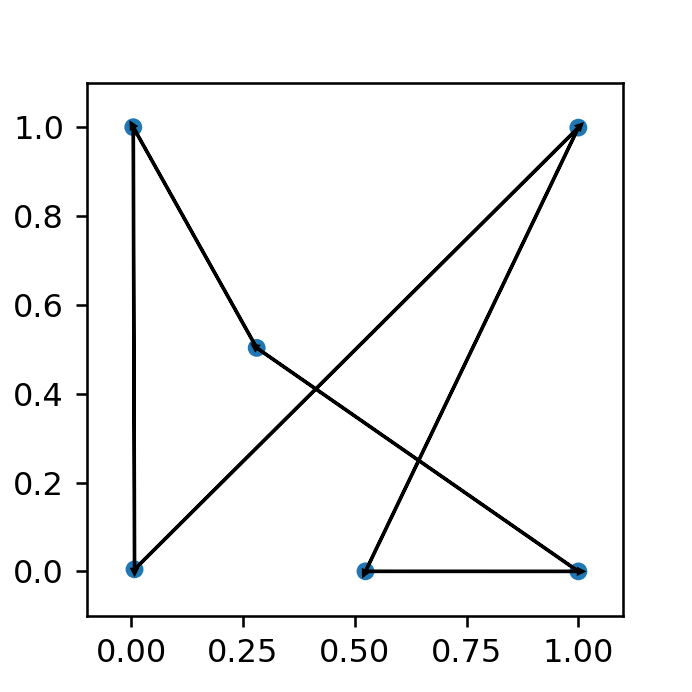

In [101]:
fig, ax = plt.subplots(figsize=(3, 3))

#lines = []
circles = []
for i in range(6):
    circles += [plt.Circle((xbest[i], ybest[i]), 0.02)]
    ax.add_artist(circles[i])
    
for i in range(6):
    ax.arrow(xbest[i], ybest[i], xbest[(i+1)%6]-xbest[i], ybest[(i+1)%6]-ybest[i], head_width=0.01, head_length=0.01, fc='k', ec='k')

# ax.add_artist(ada)
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.show()

In [103]:
print(dbest)

5.42922770411
